In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:
train1 = pd.read_csv('features.csv')

In [3]:
le=preprocessing.LabelEncoder()

In [4]:
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)


In [5]:
train1 = pd.get_dummies(train1)


In [6]:
train1.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,False,False,False,False,True
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,False,False,True
2,15,1,1,1,2,0,4,3,2,2,...,False,False,False,False,True,False,False,False,False,True
3,15,4,2,1,3,0,3,2,2,1,...,False,False,False,False,True,False,False,False,False,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,False,True,False,False,False,False,True
5,16,4,3,1,2,0,5,4,2,1,...,False,False,False,False,True,False,False,False,False,True
6,16,2,2,1,2,0,4,4,4,1,...,False,False,False,False,True,False,False,False,False,True
7,17,4,4,2,2,0,4,1,4,1,...,False,False,False,True,False,False,False,False,False,True
8,15,3,2,1,2,0,4,2,2,1,...,False,False,True,False,False,False,False,True,False,False
9,15,3,4,1,2,0,5,5,1,1,...,False,False,False,False,True,False,False,False,False,True


In [7]:
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,False,False,False,False,True
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,False,False,True
2,15,1,1,1,2,0,4,3,2,2,...,False,False,False,False,True,False,False,False,False,True
3,15,4,2,1,3,0,3,2,2,1,...,False,False,False,False,True,False,False,False,False,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,False,True,False,False,False,False,True


In [8]:
                                ###  SPLIT DATA ###

In [9]:
x_train,x_val,y_train,y_val = train_test_split(train1,y,random_state=0,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(730, 74)
(730,)
(314, 74)
(314,)


In [10]:
def confusionmatrix(y_val,y_pred):
    #labels = list(range(0,21))
    cm=confusion_matrix(y_val,y_pred)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    total = lambda x : x.sum()/5
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('percentage of sensitivity = '+str(total(TPR)*100))

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('percentage of precision = '+str(total(PPV)*100))
    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy percentage = '+str(total(ACC)*100))

In [11]:
                        ###  LOGISTIC REGRESSION  ###

In [12]:
def logistic_regression(x_train,y_train,x_val,y_val):
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_val)
    y_predict = lr.predict_proba(x_val)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    print("Accuracy_Score: ",accuracy_score(y_val,y_pred))
    confusionmatrix(y_val,y_pred)
    return y_pred

In [13]:
                        ###   RANDOM FOREST   ###

In [14]:
def random_forest(x_train,y_train,x_val,y_val):
    random_forest = RandomForestClassifier(n_estimators=36,min_samples_leaf=2,random_state=0)

    f = random_forest.fit(x_train, y_train)
    print("Random Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
              "Cross Validation Score" ,":" , f.score(x_val, y_val))
    Y_pred = random_forest.predict_proba(x_val)
    Y_pred1 = random_forest.predict(x_val)
    print("Log_Loss: ",log_loss(y_val,Y_pred))
    confusionmatrix(y_val,Y_pred1)

c:\Users\ejike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Log_Loss:  0.529458656190606
Accuracy_Score:  0.7961783439490446


NameError: name 'labels' is not defined

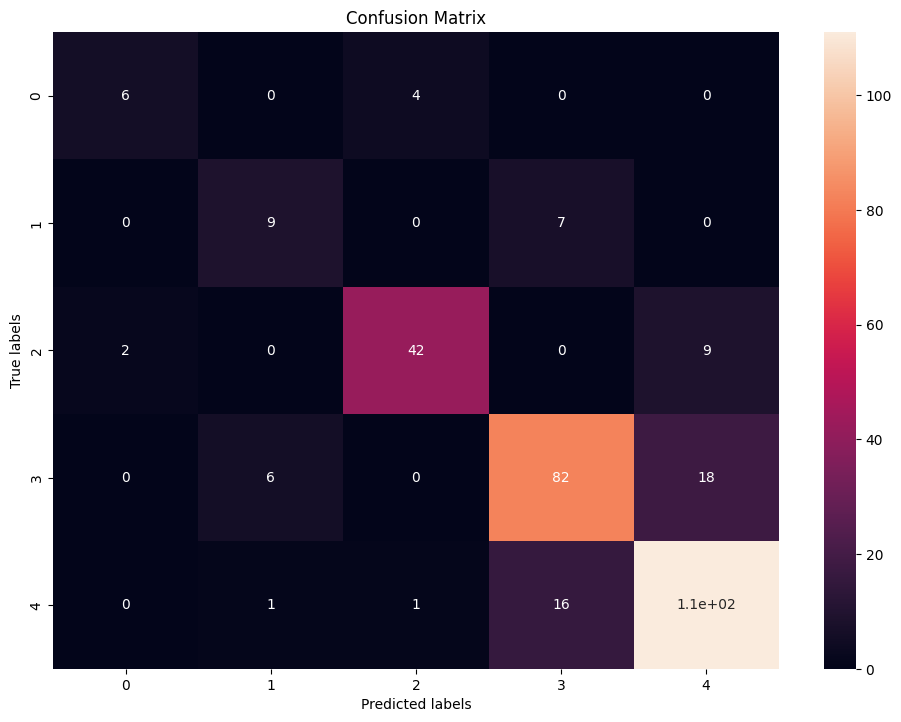

In [15]:
y_score =logistic_regression(x_train,y_train,x_val,y_val)

Random Forest Model Score : 0.9506849315068493 , Cross Validation Score : 0.821656050955414
Log_Loss:  0.49723286948097606


NameError: name 'labels' is not defined

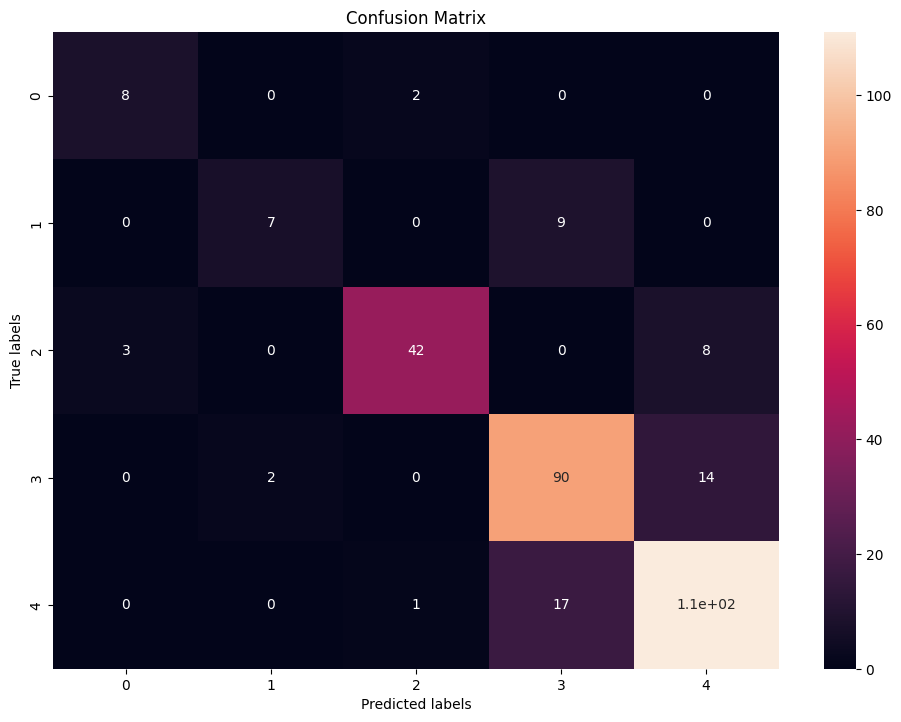

In [16]:
random_forest(x_train,y_train,x_val,y_val)

In [1557]:
def SVM_Model(X_train,Y_train,X_test,y_val):
    svc = SVC()
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
#     y_predict = svc.predict_proba(X_test)
#   print("Accuracy_train: ",accuracy_score(y_val,y_predict))
#   print("Accuracy_val: ",accuracy_score(y_val,y_predict))
    print("SVC Model Score" , ":" , svc.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , svc.score(X_test, y_val))
#     print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)

/home/srujan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Model Score : 0.8904109589041096 , Cross Validation Score : 0.8343949044585988
percentage of sensitivity = 69.78353078835747
percentage of precision = 79.07020925461185
Accuracy percentage = 92.73885350318471


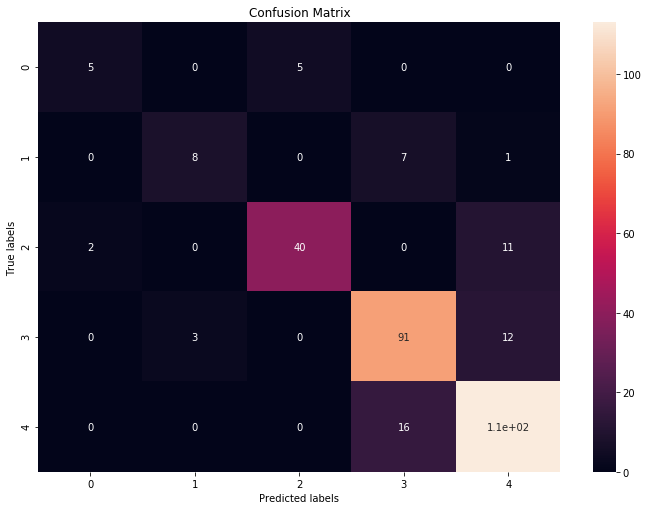

In [1558]:
SVM_Model(x_train,y_train,x_val,y_val)

In [1559]:
def Decison_tree_Model(x_train,y_train,x_val,y_val):
    tree = DecisionTreeClassifier(min_samples_leaf=17)
    t= tree.fit(x_train, y_train)
    y_pred = t.predict(x_val)
    y_predict = t.predict_proba(x_val)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    print("Decisioin Tree Model Score" , ":" , t.score(x_train, y_train) , "," , 
          "Cross Validation Score" ,":" , t.score(x_val, y_val))
    confusionmatrix(y_val,y_pred)

Log_Loss:  1.7825010124727543
Decisioin Tree Model Score : 0.8506849315068493 , Cross Validation Score : 0.8057324840764332
percentage of sensitivity = 72.99133391838527
percentage of precision = 78.22272347535504
Accuracy percentage = 92.22929936305732


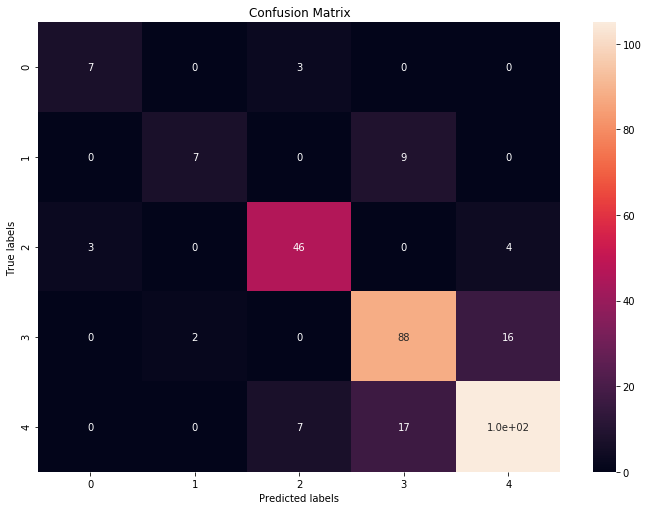

In [1560]:
Decison_tree_Model(x_train,y_train,x_val,y_val)

In [1561]:
def ada_boost_model(x_train,y_train,x_val,y_val):
    ada = AdaBoostClassifier(n_estimators=2)
    af = ada.fit(x_train, y_train)
    y_pred = af.predict(x_val)
    y_predict = af.predict_proba(x_val)
    print("Ada Boost Model Score" , ":" , af.score(x_train, y_train) , "," ,
          "Cross Validation Score" ,":" , af.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)

Ada Boost Model Score : 0.7684931506849315 , Cross Validation Score : 0.7866242038216561
Log_Loss:  0.6781340590102064
percentage of sensitivity = 53.118326751499204
percentage of precision = nan
Accuracy percentage = 91.46496815286625


/home/srujan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/srujan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


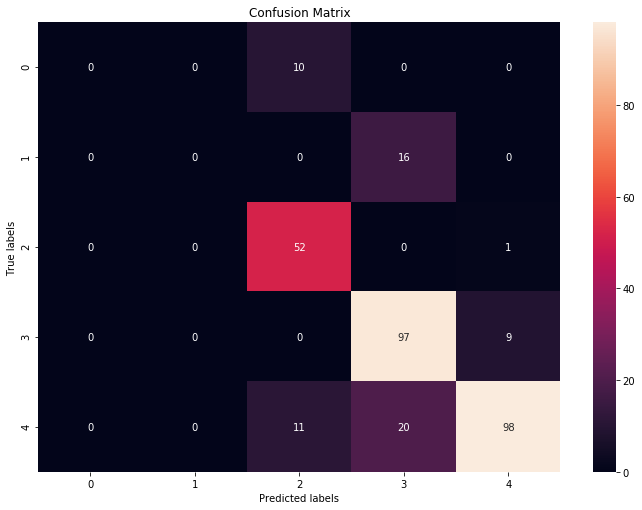

In [1562]:
ada_boost_model(x_train,y_train,x_val,y_val)

In [1563]:
def ROC_plot(y_score):
    train = pd.read_csv('features.csv')
    train.head()
    y=train[['FinalGrade']]
    train = train.drop(['G3'],axis=1);
    train = train.drop(['FinalGrade'],axis=1);
    train = train.drop(['G2'],axis=1);
    train = train.drop(['G1'],axis=1);
    y = label_binarize(y, classes=['Failure','Poor','Satisfactory','Good','Excellent'])
    n_classes = y.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(train,y,random_state=0)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    # Individual ROC
    plt.figure()
    lw = 2
    for i in (0,1):
        plt.subplot(1,2,i+1)
        plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")

    plt.plot()

    plt.figure()
    lw = 2
    for i in (2,3):
        plt.subplot(1,2,i-1)
        plt.plot(fpr[i], tpr[i], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")

    plt.plot()

    plt.figure()
    lw = 2
    plt.subplot(1,2,1)
    plt.plot(fpr[4], tpr[4], color='grey',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[4])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic label'+str(4))
    plt.legend(loc="lower right")
    plt.plot()
    
    
    # Combined ROC
    
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
        print('Area Under the Curve with label '+str(i)+' is '+str(roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (10,6)
    
    

In [1564]:
ROC_plot(y_score)

IndexError: too many indices for array